In [200]:
from PIL import Image
import cv2
import os
import numpy as np
import json
from matplotlib import pyplot as plt

filename_json = 'deerjacob.json'
filename_jpg = 'deerjacob.jpg'

path = os.path.join(os.path.dirname("__file__"), "data" )
path_image = os.path.join(path,'public-images',filename_jpg)
path_json = os.path.join(path,'annotations-public','dares-v2','annotations', filename_json)



In [201]:
image_names = os.listdir(os.path.join(path,'vejdirektoratet-images'))
json_names = os.listdir(os.path.join(path,'inference-all-v3','annotations'))
match = []
for name in image_names:
    print(name[:-4])
    for target in json_names:
        if name[:-4] == target[:-5]:
            match.append(target)
            break
print(match)

GT_2021-06-18T08_06_48.000Z_CT_1622493881.071205_9.6939225_56.7626155
GT_2021-06-22T06_24_19.000Z_CT_1622491599.5416353_9.813402333_55.900534333
GT_2021-06-18T12_01_24.000Z_CT_1622494332.9654772_9.855731_56.939251333
GT_2021-06-18T08_29_50.000Z_CT_1622495263.5375721_9.973654333_57.086197833
GT_2021-06-18T08_47_55.000Z_CT_1622496347.9509263_10.220045333_57.221539333
GT_2021-06-18T08_06_15.000Z_CT_1622493847.9161215_9.695296833_56.753220667
GT_2021-06-18T07_48_41.000Z_CT_1622492794.3627589_9.97162_56.508852833
GT_2021-06-18T12_15_33.000Z_CT_1622495182.3964024_9.721475333_56.719052167
GT_2021-06-22T06_24_19.000Z_CT_1622491599.1490638_9.813402333_55.900534333
GT_2021-06-18T11_15_17.000Z_CT_1622491566.2577558_10.3181485_57.244291333
GT_2021-06-18T08_02_19.000Z_CT_1622493611.934504_9.731129333_56.684843167
GT_2021-06-18T08_10_39.000Z_CT_1622494112.149835_9.724462167_56.826289833
GT__CT_1622492387.4075716_0.0_0.0
GT_2021-06-18T08_23_36.000Z_CT_1622494889.5714931_9.936154333_57.013159
GT_2021-

In [202]:
with open(path_json) as json_file:
    data = json.load(json_file)
box = data["annotations"][0]["bounding_box"]


In [203]:
path_image

'data/public-images/deerjacob.jpg'

In [204]:
img = Image.open(path_image)

In [205]:
img = cv2.imread(path_image)
color = (255, 0, 0)
thickness = 2
img = cv2.rectangle(img, (int(box["x"]), int(box["y"])), (int(box["x"]) + int(box["w"]), int(box["y"]) + int(box["h"])),color,thickness)

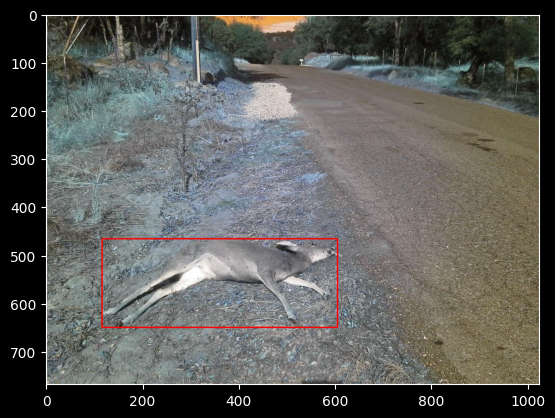

In [206]:

plt.imshow(img)

(116, 466, 605, 650)


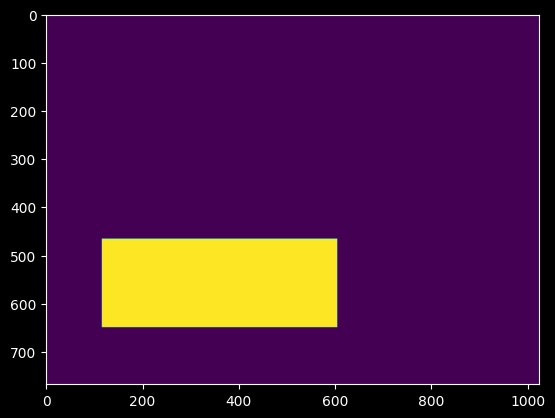

In [207]:
x = int(box["x"])
y = int(box["y"])
w = int(box["w"])
h = int(box["h"])
print((x, y, x + w, y + h))

bm = np.zeros(img.shape[0:2])
bm.shape
bm[y:y+h,x:x+w] = 1
bm
plt.imshow(bm)
# make this into function, Georg

In [208]:
# 2 w